In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import os
import numpy as np
from src.data import PancreasDataset
from src.utils.config import load_config
from src.data.transforms import standard_transforms, build_transforms_from_config
from src.data.augmentation import standard_augmentations, Augment
from src.utils.visualization import visualize_sample

In [121]:
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

# Testing `standard_transforms`

In [128]:
config = load_config()
RAW_DIR = config['data']['raw_dir']
sample_dirs = [os.path.join(RAW_DIR, sd) for sd in os.listdir(RAW_DIR)]
ds = PancreasDataset(
    sample_dirs=sample_dirs,
    split_path='data/splits/one.json',
    split_type='train',
    transform=standard_transforms,
    augment=Augment(standard_augmentations)
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


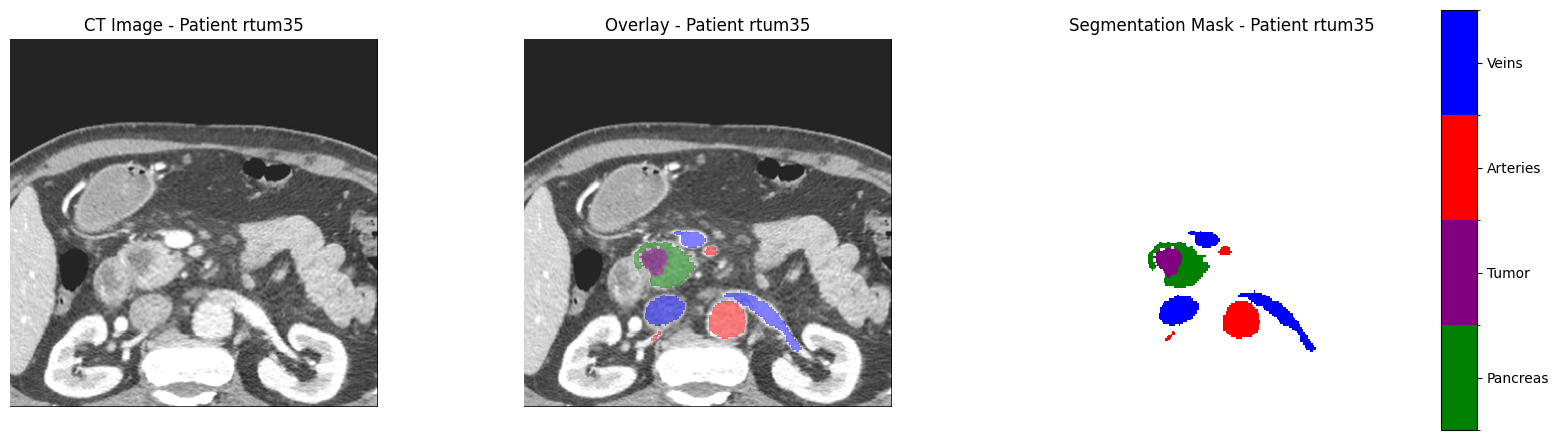

In [129]:
visualize_sample(ds, 28, alpha=0.5, zoom=0.0)

# Testing `build_transforms_from_config`

In [133]:
transforms_config = load_config('configs/experiments/one_deep.yaml').get('transforms', None)
print(transforms_config)

[{'ApplyWindow': {'window_level': 50, 'window_width': 400}}, {'Normalize': {}}, {'CropBorders': {'crop_size': 120}}, {'Resize': {'size': [8, 8]}}, {'ToTensor': {}}]


In [134]:
transforms = build_transforms_from_config(transforms_config)
ds_t = PancreasDataset(
    sample_dirs=sample_dirs,
    split_path='data/splits/one.json',
    split_type='train',
    transform=transforms,
    augment=None
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


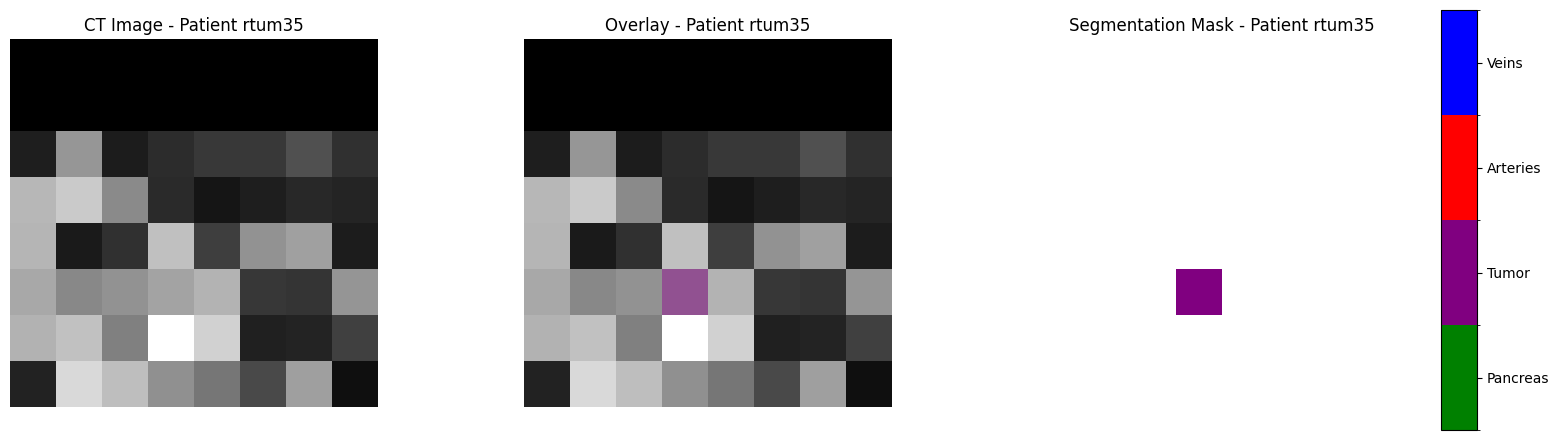

In [135]:
visualize_sample(ds_t, 28, alpha=0.5, zoom=0.0)

# Testing `build_augmentations_from_config`

In [136]:
from src.data.augmentation import build_augmentations_from_config

In [140]:
aug_config = load_config('configs/experiments/one_deep.yaml').get('augmentations', None)
print(aug_config)

[{'Affine': {'scale': [0.95, 1.05], 'translate_percent': [0.02, 0.02], 'rotate': [-10, 10], 'p': 0.2}}, {'RandomBrightnessContrast': {'brightness_limit': 0.2, 'contrast_limit': 0.2, 'p': 0.3}}, {'GaussianBlur': {'blur_limit': [3, 7], 'p': 0.3}}, {'ElasticTransform': {'alpha': 1.0, 'sigma': 50, 'p': 0.3}}, {'GridDistortion': {'num_steps': 5, 'distort_limit': 0.3, 'p': 0.3}}, {'ToTensorV2': {}}]


In [141]:
augment = build_augmentations_from_config(aug_config)
ds_a = PancreasDataset(
    sample_dirs=sample_dirs,
    split_path='data/splits/one.json',
    split_type='train',
    transform=None,
    augment=augment
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


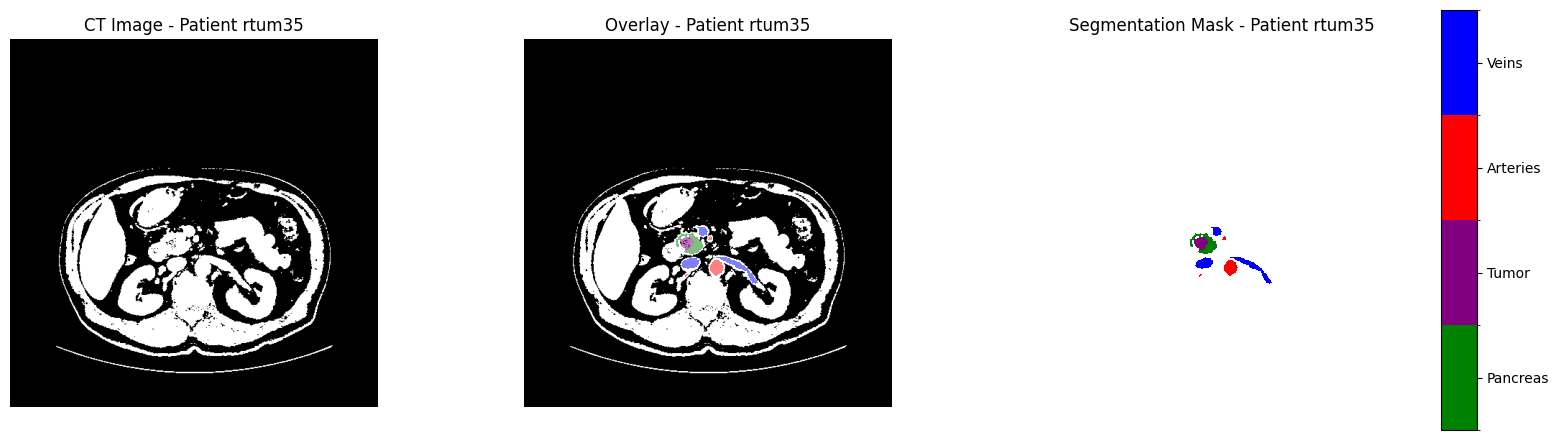

In [142]:
visualize_sample(ds_a, 28, alpha=0.5, zoom=0.0)